In [1]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.describe()

,age,bmi,charges,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,0.204783
std,14.049960,6.098187,12110.011237,0.403694
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,0.000000
75%,51.000000,34.693750,16639.912515,0.000000
max,64.000000,53.130000,63770.428010,1.000000


Checking if the data set has any NaN values in any column

In [11]:
df.isnull().sum().sum()

0

Convert categorical data into numeric

In [3]:
df = pd.get_dummies(
    data=df, columns=['smoker', 'sex', 'region'], drop_first=True)
df.head()


,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


Find correlation between data to identify which columns affect charges

In [5]:
corr_matrix = df.corr()
corr_matrix

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292,-0.039905,0.073982,-0.043210
smoker_yes,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185,-0.036945,0.068498,-0.036945
sex_male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000,-0.011156,0.017117,-0.004184
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.036945,-0.011156,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.068498,0.017117,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.036945,-0.004184,-0.320829,-0.346265,1.000000


View correlation between charges and other columns

In [6]:
corr_matrix['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
smoker_yes          0.787251
sex_male            0.057292
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64

To simplify the model, data with correlation absolute values less than 0.1 can be considered insignificant and so they can be dropped.



In [7]:
df.drop(['children', 'sex_male', 'region_northwest',
        'region_southeast', 'region_southwest'], axis=1, inplace=True)


In [8]:
df.head()

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


Linear regression model using scikit-learn

In [34]:
# function definition

def sklearn_linear_regression(X_train, y_train, X_test):

    line = linear_model.LinearRegression()
    line = line.fit(X_train, y_train)

    # Test the model using training dataset
    y_pred = line.predict(X_train)

    # Show real vs predicted results
    print('W: ', line.coef_)
    print('b: ', line.intercept_, '\n')
    print('Test:\n', X_test, '\nPredicted:\n', line.predict(X_test), '\n')
    print('Real:\n', y_train, '\n')
    print("R^2-score:", r2_score(y_train, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_train, y_pred))

    # Plot the results
    plt.scatter(y_train, y_pred)
    plt.xlabel('Real Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Linear regression using Scikit-learn')
    plt.show()


Randomly splitting the dataset into a training set and a testing set

In [35]:
train , test = np.split(df.sample(frac=1), [int(0.8*len(df))])
print("test set:")
print(test.describe())
print()
print("train set:")
print(train.describe())

test set:
              age         bmi       charges  smoker_yes
count  268.000000  268.000000    268.000000  268.000000
mean    38.380597   30.910840  12778.699025    0.182836
std     14.435596    6.204658  12103.079353    0.387255
min     18.000000   16.815000   1121.873900    0.000000
25%     25.750000   26.721250   4254.839637    0.000000
50%     38.000000   30.500000   9118.009625    0.000000
75%     51.000000   35.112500  15062.515600    0.000000
max     64.000000   49.060000  62592.873090    1.000000

train set:
               age          bmi       charges   smoker_yes
count  1070.000000  1070.000000   1070.000000  1070.000000
mean     39.414019    30.601421  13393.582852     0.210280
std      13.950923     6.072587  12114.275863     0.407698
min      18.000000    15.960000   1131.506600     0.000000
25%      27.000000    26.053750   4879.452288     0.000000
50%      40.000000    30.210000   9423.922650     0.000000
75%      51.000000    34.430000  17003.737050     0.000000
ma

W:  [  269.49738464   325.72049264 23610.81658094]
b:  -12160.793220688007 

Test:
       age     bmi  smoker_yes
248    19  20.900           0
89     55  26.980           0
720    51  40.660           0
1202   22  32.110           0
1330   57  25.740           0
...   ...     ...         ...
1037   45  30.495           1
189    29  32.110           0
723    19  35.400           0
282    30  27.645           0
1031   55  35.200           1

[268 rows x 3 columns] 
Predicted:
 [ -232.78461641 11449.50182589 14827.3686266   4227.03425997
 11584.6031843  12434.66102405 10611.8401197   8542.95495134
  6244.5094817   3146.90759672 13302.85142899 12378.87379225
 12377.80522991 16349.89399158 29592.63367197 13696.97322509
  6634.10870056  5308.98633565 14826.30006425  8166.60249028
  8299.36991404 31255.07355672 18414.81662283 16641.19589439
  5292.70031101  3152.30192634 27355.07917962 -1024.35805955
  2538.10085962  7146.5373082   4408.73240367  5441.75375941
  8177.4426674   8037.04075354 

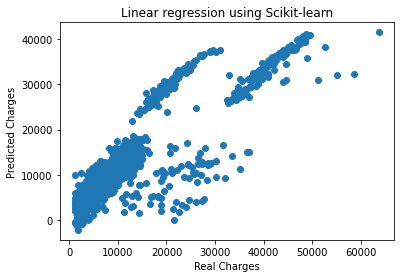

In [36]:
sklearn_linear_regression(
    train[['age', 'bmi', 'smoker_yes']], train["charges"], test[['age', 'bmi', 'smoker_yes']])
